# Ejercicio 4
## Reyes Romero Alejandro
### Instrucciones:

#### Aproximar la solución del problema:

$\frac{dy}{dt}=y-t^{2}+1$ en $0≤t≤4$

$y(0)=0.5$

para $h_{t}= 1.0,0.5,0.25,0.125$ $(N_t= 4,8,16,32)$.

En todos los casos usando:
1. Método de Euler.
2. Método de Runge-Kutta de orden 2.
3. Método de Runge-Kutta de orden 3.
4. Método de Runge-Kutta de orden 4.

La solución exacta es: $y(t)=(t+1)^{2}−0.5e^{t}$

Grafique la solución exacta y compárela con las soluciones numéricas obtenidas con cada método.
Grafique el error y explique el comportamiento de cada método.


In [1]:
#Importamos los módulos necesarios:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Definimos las funciones que se van a utilizar:
def  mesh(a, b, Nt):
    """
    A partir de un valor de inicio en a y otro en b, calcula el tamaño de espaciamiento de la malla con 
    base en  el número de puntos Nt.
    """
    ht = (b-a) / Nt
    return  ht
def f(t,y):
    """
    Calcula el valor de la ecuación del problema, dado un punto x y su valor asociado y 
    """
    return y - t**2 + 1
def  Exacta(t):
    """
    Calcula la solución exacta del problema, dado un dominio
    """
    return (t+1)**2  - 0.5 * np.exp(t)
def  Euler(f, t, w, ht):
    """
    Calcula el método de Euler dado una función (f), un dominio (t), un vector solución con y0 (w) 
    y un tamaño de espaciamiento de malla (ht)
    """
    for i, val in  enumerate(w[0: -1]):
        w[i+1] = w[i] + ht * f(t[i], w[i])
        t[i+1] = t[0] + (i+1) * ht
def  RK2(f, t, w, ht):
    """
    Calcula el método de Runge-Kutta de orden 2 dado una función (f), un dominio (t), un vector solución con y0 (w) 
    y un tamaño de espaciamiento de malla (ht)
    """
    for i, val in  enumerate(w[0: -1]):
        k1 = ht * f(t[i], w[i])
        w[i+1] = w[i] +ht * f(t[i] + ht * 0.5,w[i] + k1 * 0.5)
        t[i+1] = a + (i+1) * ht

def  RK3(f, t, w, ht):
    """
    Calcula el método de Runge-Kutta de orden  dado una función (f), un dominio (t), un vector solución con y0 (w) 
    y un tamaño de espaciamiento de malla (ht)
    """
    for i, val in  enumerate(w[0: -1]):
        k1 = ht * f(t[i], w[i])
        k2 = ht * f(t[i] + ht/3,w[i] + k1 / 3)
        k3 = ht * f(t[i] + 2 * ht / 3,w[i] + 2 * k2 / 3)
        w[i+1] = w[i] + (k1 + 3 * k3) / 4
        t[i+1] = a + (i+1) * ht
def  RK4(f, t, w, ht):
    """
    """
    for i, val in  enumerate(w[0: -1]):
        k1 = ht * f(t[i], w[i])
        k2 = ht * f(t[i] + ht/2,w[i] + k1 / 2)
        k3 = ht * f(t[i] + ht/2,w[i] + k2 / 2)
        k4 = ht * f(t[i] + ht, w[i] + k3)
        w[i+1] = w[i] + (k1 + 2*k2 +2*k3 + k4) / 6
        t[i+1] = a + (i+1) * ht
def ztn(values):
    """Reemplaza todos los valores iguales a cero por NaN"""
    return [float('nan') if x==0 else x for x in values]

### Para $N_t=4$

In [3]:
Nt = 4
a = 0
b = 4
ht = mesh(a, b, Nt)
Tmax=ht*Nt
y0 = 0.5
t   = np.linspace(a, b, Nt+1)
et  = np.linspace(0,Nt,Nt+1)

y_eul = np.zeros(Nt+1);
y_rk2 = np.zeros(Nt+1)
y_rk3 = np.zeros(Nt+1)
y_rk4 = np.zeros(Nt+1)

y_eul [0]=y0
y_rk2 [0]=y0
y_rk3 [0]=y0
y_rk4 [0]=y0

Euler(f, t, y_eul , ht)
RK2(f, t, y_rk2 , ht)
RK3(f, t, y_rk3 , ht)
RK4(f, t, y_rk4 , ht)

tl = np.linspace(0, Tmax , 100)
y_exacta = Exacta(tl)

yp = Exacta(t)
e_eul = np.abs(yp - y_eul)
e_rk2 = np.abs(yp - y_rk2)
e_rk3 = np.abs(yp - y_rk3)
e_rk4 = np.abs(yp - y_rk4)

n_error_eul = np.linalg.norm(e_eul , 2)
n_error_rk2 = np.linalg.norm(e_rk2 , 2)
n_error_rk3 = np.linalg.norm(e_rk3 , 2)
n_error_rk4 = np.linalg.norm(e_rk4 , 2)

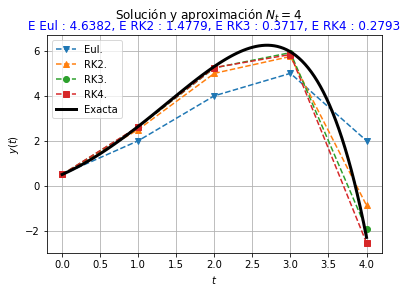

In [4]:
#Grafica de resultados
Error = 'E Eul : {:03.4f}, E RK2 : {:03.4f}, E RK3 : {:03.4f}, E RK4 : {:03.4f}'.format(n_error_eul,n_error_rk2,n_error_rk3,n_error_rk4)
fig , (ax1) = plt.subplots(1,1)
fig.suptitle('Solución y aproximación $N_t={}$'.format(Nt))
ax1.plot(t , y_eul, 'v--',label='Eul.')
ax1.plot(t , y_rk2, '^--',label='RK2.')
ax1.plot(t , y_rk3, 'o--',label='RK3.')
ax1.plot(t , y_rk4, 's--',label='RK4.')
ax1.plot(tl, y_exacta , 'k-', lw=3, label='Exacta')
ax1.set_title(Error, fontsize =12,  color='blue')
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc='upper left', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax1.grid()
plt.savefig('Resultados_Nt{}.pdf'.format(Nt))
plt.show()

Para el caso de esta solución es visible que el método de Euler no es tan efectivo ya que es el que menos se acerca, en cambio los métodos de Runge-Kutta se parecen bastante, incluso al haber sólo 4 puntos, las aproximaciones son muy cercanas a la real. 

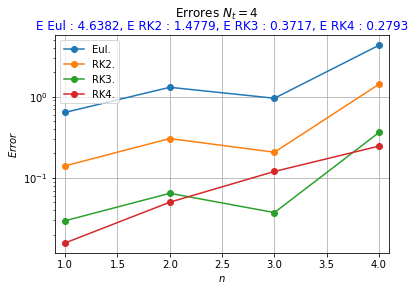

In [5]:
#Grafica de errores
Error = 'E Eul : {:03.4f}, E RK2 : {:03.4f}, E RK3 : {:03.4f}, E RK4 : {:03.4f}'.format(n_error_eul,n_error_rk2,n_error_rk3,n_error_rk4)
fig , (ax1) = plt.subplots(1,1)
fig.suptitle('Errores $N_t={}$'.format(Nt))
ax1.plot(et , ztn(e_eul),'o-',label='Eul.')
ax1.plot(et , ztn(e_rk2),'o-',label='RK2.')
ax1.plot(et , ztn(e_rk3),'o-',label='RK3.')
ax1.plot(et , ztn(e_rk4),'o-',label='RK4.')
ax1.set_title(Error, fontsize =12,  color='blue')
ax1.set_xlim(0.9,Nt+0.1)
ax1.set_yscale('log')
ax1.set_xlabel('$n$')
ax1.set_ylabel('$Error$')
ax1.legend(loc='upper left', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax1.grid()
plt.savefig('Errores_Nt{}.pdf'.format(Nt))
plt.show()

En el caso de los errores se puede observar un comportamiento similar en casi todos, menos en el tercer punto, para la aproximación RK3 y Rk4 ya que el orden se invierte, teniendo un error más grande RK4, y un comportamiento más lineal. En cambio, los errores de los otros métodos siguen comportamientos parecidos, teniendo un error más grande en el cuarto punto.

### Para $N_{t}=8$ 

In [6]:
Nt = 8
a = 0
b = 4
ht = mesh(a, b, Nt)
y0 = 0.5
t   = np.linspace(a, b, Nt+1)
et  = np.linspace(0,Nt,Nt+1)

y_eul = np.zeros(Nt+1);
y_rk2 = np.zeros(Nt+1)
y_rk3 = np.zeros(Nt+1)
y_rk4 = np.zeros(Nt+1)

y_eul [0]=y0
y_rk2 [0]=y0
y_rk3 [0]=y0
y_rk4 [0]=y0

Euler(f, t, y_eul , ht)
RK2(f, t, y_rk2 , ht)
RK3(f, t, y_rk3 , ht)
RK4(f, t, y_rk4 , ht)

yp = Exacta(t)
e_eul = np.abs(yp - y_eul)
e_rk2 = np.abs(yp - y_rk2)
e_rk3 = np.abs(yp - y_rk3)
e_rk4 = np.abs(yp - y_rk4)

n_error_eul = np.linalg.norm(e_eul , 2)
n_error_rk2 = np.linalg.norm(e_rk2 , 2)
n_error_rk3 = np.linalg.norm(e_rk3 , 2)
n_error_rk4 = np.linalg.norm(e_rk4 , 2)

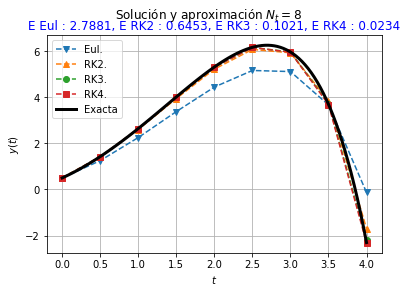

In [7]:
#Grafica de resultados
Error = 'E Eul : {:03.4f}, E RK2 : {:03.4f}, E RK3 : {:03.4f}, E RK4 : {:03.4f}'.format(n_error_eul,n_error_rk2,n_error_rk3,n_error_rk4)
fig , (ax1) = plt.subplots(1,1)
fig.suptitle('Solución y aproximación $N_t={}$'.format(Nt))
ax1.plot(t , y_eul, 'v--',label='Eul.')
ax1.plot(t , y_rk2, '^--',label='RK2.')
ax1.plot(t , y_rk3, 'o--',label='RK3.')
ax1.plot(t , y_rk4, 's--',label='RK4.')
ax1.plot(tl, y_exacta , 'k-', lw=3, label='Exacta')
ax1.set_title(Error, fontsize =12,  color='blue')
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc='upper left', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax1.grid()
plt.savefig('Resultados_Nt{}.pdf'.format(Nt))
plt.show()

En el caso de Nt=8, se pude observar que los métodos de Runge-Kutta, ya convergen con la solución exacta, a diferencia del método de Euler, que todavía tiene grandes diferencias con la solución exacta. Se puede ver que en el caso del último punto es donde más se alejan las aproximaciones de la solución real. 

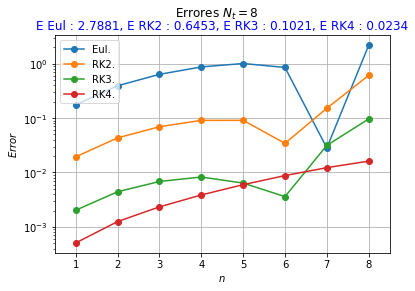

In [8]:
#Grafica de errores
Error = 'E Eul : {:03.4f}, E RK2 : {:03.4f}, E RK3 : {:03.4f}, E RK4 : {:03.4f}'.format(n_error_eul,n_error_rk2,n_error_rk3,n_error_rk4)
fig , (ax1) = plt.subplots(1,1)
fig.suptitle('Errores $N_t={}$'.format(Nt))
ax1.plot(et , ztn(e_eul),'o-',label='Eul.')
ax1.plot(et , ztn(e_rk2),'o-',label='RK2.')
ax1.plot(et , ztn(e_rk3),'o-',label='RK3.')
ax1.plot(et , ztn(e_rk4),'o-',label='RK4.')
ax1.set_title(Error, fontsize =12,  color='blue')
ax1.set_xlim(0.5,Nt+0.5)
ax1.set_yscale('log')
ax1.set_xlabel('$n$')
ax1.set_ylabel('$Error$')
ax1.legend(loc='upper left', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax1.grid()
plt.savefig('Errores_Nt{}.pdf'.format(Nt))
plt.show()

Los errores para el caso de Nt=8, se comportan de una manera diferente a la iteración anterior. Antes del punto 4, todas tienen un comportamiento ascendente, pero en el punto 5, los valores aproximados por RK3 Y RK4, tienen un valor similar y en el punto 6 RK3 es la que menor error presenta, volviendo a tener valores de error mayores que RK4 en el punto 7. RK2 igual presenta una fluctuación en el punto 6. El método de Euler, también aproxima de muy buena manera al punto 7, mejor que el RK2. Como el caso anterior, el punto con mayor error para todos los casos es el último.

### Para $N_{t}=16$ 

In [9]:
Nt = 16
a = 0
b = 4
ht = mesh(a, b, Nt)
y0 = 0.5
t   = np.linspace(a, b, Nt+1)
et  = np.linspace(0,Nt,Nt+1)

y_eul = np.zeros(Nt+1);
y_rk2 = np.zeros(Nt+1)
y_rk3 = np.zeros(Nt+1)
y_rk4 = np.zeros(Nt+1)

y_eul [0]=y0
y_rk2 [0]=y0
y_rk3 [0]=y0
y_rk4 [0]=y0

Euler(f, t, y_eul , ht)
RK2(f, t, y_rk2 , ht)
RK3(f, t, y_rk3 , ht)
RK4(f, t, y_rk4 , ht)

yp = Exacta(t)
e_eul = np.abs(yp - y_eul)
e_rk2 = np.abs(yp - y_rk2)
e_rk3 = np.abs(yp - y_rk3)
e_rk4 = np.abs(yp - y_rk4)

n_error_eul = np.linalg.norm(e_eul , 2)
n_error_rk2 = np.linalg.norm(e_rk2 , 2)
n_error_rk3 = np.linalg.norm(e_rk3 , 2)
n_error_rk4 = np.linalg.norm(e_rk4 , 2)

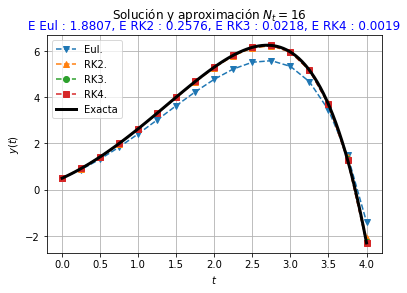

In [10]:
#Grafica de resultados
Error = 'E Eul : {:03.4f}, E RK2 : {:03.4f}, E RK3 : {:03.4f}, E RK4 : {:03.4f}'.format(n_error_eul,n_error_rk2,n_error_rk3,n_error_rk4)
fig , (ax1) = plt.subplots(1,1)
fig.suptitle('Solución y aproximación $N_t={}$'.format(Nt))
ax1.plot(t , y_eul, 'v--',label='Eul.')
ax1.plot(t , y_rk2, '^--',label='RK2.')
ax1.plot(t , y_rk3, 'o--',label='RK3.')
ax1.plot(t , y_rk4, 's--',label='RK4.')
ax1.plot(tl, y_exacta , 'k-', lw=3, label='Exacta')
ax1.set_title(Error, fontsize =12,  color='blue')
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc='upper left', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax1.grid()
plt.savefig('Resultados_Nt{}.pdf'.format(Nt))
plt.show()

Los métodos de aproximación de Runge-Kutta, ya convergieron con la solución real. El método de Euler todavía no converge, pero ya esta empezando a adquirir la forma, debido al número de puntos utilizados.

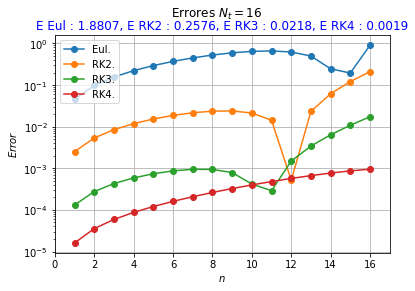

In [11]:
#Grafica de errores
Error = 'E Eul : {:03.4f}, E RK2 : {:03.4f}, E RK3 : {:03.4f}, E RK4 : {:03.4f}'.format(n_error_eul,n_error_rk2,n_error_rk3,n_error_rk4)
fig , (ax1) = plt.subplots(1,1)
fig.suptitle('Errores $N_t={}$'.format(Nt))
ax1.plot(et , ztn(e_eul),'o-',label='Eul.')
ax1.plot(et , ztn(e_rk2),'o-',label='RK2.')
ax1.plot(et , ztn(e_rk3),'o-',label='RK3.')
ax1.plot(et , ztn(e_rk4),'o-',label='RK4.')
ax1.set_title(Error, fontsize =12,  color='blue')
ax1.set_xlim(0,Nt+1)
ax1.set_yscale('log')
ax1.set_xlabel('$n$')
ax1.set_ylabel('$Error$')
ax1.legend(loc='upper left', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax1.grid()
plt.savefig('Errores_Nt{}.pdf'.format(Nt))
plt.show()

En el caso para los errores de Nt=16, el método de Euler es el que tiene con errores más grandes para todos sus puntos, pero no es tan fluctuante como RK2 y RK3 que en el punto 12 y 11, respectivamente presentan valores de error, comparables a RK4. Por su parte, este último, presenta el comportamiento más estable de todos, teniendo errores muy pequeños, para los primeros puntos y un poco más grandes en los últimos.

### Para $N_{t}=32$ 

In [12]:
Nt = 32
a = 0
b = 4
ht = mesh(a, b, Nt)
y0 = 0.5
t   = np.linspace(a, b, Nt+1)
et  = np.linspace(0,Nt,Nt+1)

y_eul = np.zeros(Nt+1);
y_rk2 = np.zeros(Nt+1)
y_rk3 = np.zeros(Nt+1)
y_rk4 = np.zeros(Nt+1)

y_eul [0]=y0
y_rk2 [0]=y0
y_rk3 [0]=y0
y_rk4 [0]=y0

Euler(f, t, y_eul , ht)
RK2(f, t, y_rk2 , ht)
RK3(f, t, y_rk3 , ht)
RK4(f, t, y_rk4 , ht)

yp = Exacta(t)
e_eul = np.abs(yp - y_eul)
e_rk2 = np.abs(yp - y_rk2)
e_rk3 = np.abs(yp - y_rk3)
e_rk4 = np.abs(yp - y_rk4)

n_error_eul = np.linalg.norm(e_eul , 2)
n_error_rk2 = np.linalg.norm(e_rk2 , 2)
n_error_rk3 = np.linalg.norm(e_rk3 , 2)
n_error_rk4 = np.linalg.norm(e_rk4 , 2)

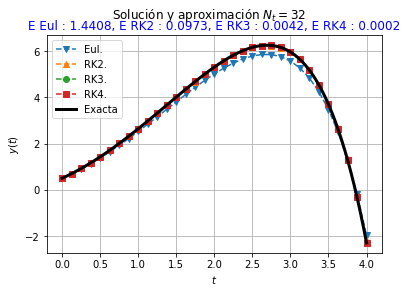

In [13]:
#Grafica de resultados
Error = 'E Eul : {:03.4f}, E RK2 : {:03.4f}, E RK3 : {:03.4f}, E RK4 : {:03.4f}'.format(n_error_eul,n_error_rk2,n_error_rk3,n_error_rk4)
fig , (ax1) = plt.subplots(1,1)
fig.suptitle('Solución y aproximación $N_t={}$'.format(Nt))
ax1.plot(t , y_eul, 'v--',label='Eul.')
ax1.plot(t , y_rk2, '^--',label='RK2.')
ax1.plot(t , y_rk3, 'o--',label='RK3.')
ax1.plot(t , y_rk4, 's--',label='RK4.')
ax1.plot(tl, y_exacta , 'k-', lw=3, label='Exacta')
ax1.set_title(Error, fontsize =12,  color='blue')
ax1.set_xlabel('$t$')
ax1.set_ylabel('$y(t)$')
ax1.legend(loc='upper left', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax1.grid()
plt.savefig('Resultados_Nt{}.pdf'.format(Nt))
plt.show()

En este caso, se puede observar que los 4 métodos ya convergieron con la solución real, aunque al método de Euler le falta poquito, ya se puede decir que paró de fluctuar. De igual manera se puede concluir que los métodos de Runge-Kutta son de convergencia rápida, ya que desde Nt=8, presentaba errores menores a 1 en RK2, mientras que los de Euler para ese caso eran mucho mayores a 1. Se puede observar que a medida que se usen más puntos, esta aproximación convergerá más y más. 

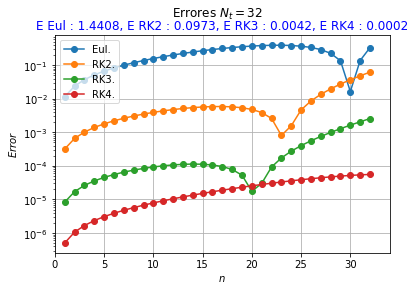

In [14]:
#Grafica de errores
Error = 'E Eul : {:03.4f}, E RK2 : {:03.4f}, E RK3 : {:03.4f}, E RK4 : {:03.4f}'.format(n_error_eul,n_error_rk2,n_error_rk3,n_error_rk4)
fig , (ax1) = plt.subplots(1,1)
fig.suptitle('Errores $N_t={}$'.format(Nt))
ax1.plot(et , ztn(e_eul),'o-',label='Eul.')
ax1.plot(et , ztn(e_rk2),'o-',label='RK2.')
ax1.plot(et , ztn(e_rk3),'o-',label='RK3.')
ax1.plot(et , ztn(e_rk4),'o-',label='RK4.')
ax1.set_title(Error, fontsize =12,  color='blue')
ax1.set_xlim(0,Nt+2)
ax1.set_yscale('log')
ax1.set_xlabel('$n$')
ax1.set_ylabel('$Error$')
ax1.legend(loc='upper left', ncol=1,  framealpha =0.75,  fancybox=True , fontsize =10)
ax1.grid()
plt.savefig('Errores_Nt{}.pdf'.format(Nt))
plt.show()

Para este caso los errores de RK4, ya son tan pequeños, que sólo son alcanzados en una vez por los calculados por RK3, igual en cuestión de escalas, los de Runge-Kutta, ya no llegan a tocar el $10^{0}$ mientras que los errores calculados por el método de Euler, fluctúan en esos valores. 